# Regla de Armijo

## Un ejemplo donde todo va mal

In [57]:
import numpy as np
import matplotlib.pyplot as plt

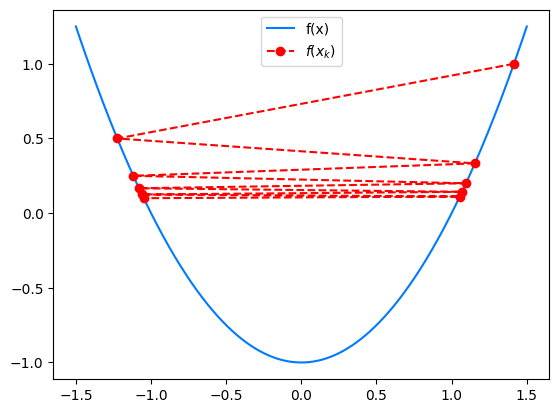

In [58]:
x = np.linspace(-1.5, 1.5, 1000)
y = x**2 - 1
xx = np.zeros(10)
yy = np.zeros(10)

for k in range(10):
    xx[k] = (-1)**k * np.sqrt(1 + (1 / (k+1)))
    yy[k] = xx[k]**2 - 1

fig, ax = plt.subplots()
ax.plot(x, y, '-', color='#007AFF', label='f(x)')
ax.plot(xx, yy, 'o--', color='#FF0000', label=r'$f(x_k)$')
ax.legend(loc='upper center')
plt.show()

# Implementamos la regla de Armijo con *Backtracking*

In [59]:
def armijo_rule(
        func, grad_func, x, alpha, beta=0.5, c=0.1, max_iter=100
):
    grad = grad_func(x)
    iter_counter = 0
    # Backtracking algorhitmic
    while iter_counter < max_iter:
        if (func(x - alpha * grad) <= func(x) - c * alpha * (grad * grad)):
            return alpha
        else: 
            alpha *= beta
            iter_counter += 1
    raise ValueError("Armijo no converge")
    

In [60]:
def f(x):
    return x**2 - 1

def grad_f(x):
    return 2 * x

x_0 = np.sqrt(2) # Punto inicial
alpha = 0.7
step_size = armijo_rule(f, grad_f, x_0, alpha)

print(f"step_size = {step_size}")

step_size = 0.7


# Algoritmo de gradiente determinista

In [61]:
def gradient_descent(
  objetive, initial_guess, gradient, n_iter, step_size      
):
    solution = initial_guess
    iterations, solutions, scores = list(), list(), list()
    for i in range(n_iter):
        iterations.append(i)
        solutions.append(solution)
        solution_eval = objetive(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
        
        grad = gradient(solution)
        step_size = armijo_rule(objetive, gradient, solution, step_size)
        print(f"Armijo's step_size = {step_size} ")
        solution = solution - step_size * grad
        
    return [iterations, solutions, scores]

In [62]:
# Ejecutamos el código con los datos del inicio
initial_guess = np.sqrt(2)
step_size = 0.7
n_iter = 10
iterations, solutions, scores = gradient_descent(f, initial_guess, grad_f, n_iter, step_size)

>0 f(1.4142135623730951) = 1.00000
Armijo's step_size = 0.7 
>1 f(-0.565685424949238) = -0.68000
Armijo's step_size = 0.7 
>2 f(0.22627416997969518) = -0.94880
Armijo's step_size = 0.7 
>3 f(-0.09050966799187804) = -0.99181
Armijo's step_size = 0.7 
>4 f(0.0362038671967512) = -0.99869
Armijo's step_size = 0.7 
>5 f(-0.014481546878700478) = -0.99979
Armijo's step_size = 0.7 
>6 f(0.00579261875148019) = -0.99997
Armijo's step_size = 0.7 
>7 f(-0.0023170475005920756) = -0.99999
Armijo's step_size = 0.7 
>8 f(0.0009268190002368303) = -1.00000
Armijo's step_size = 0.7 
>9 f(-0.0003707276000947321) = -1.00000
Armijo's step_size = 0.7 


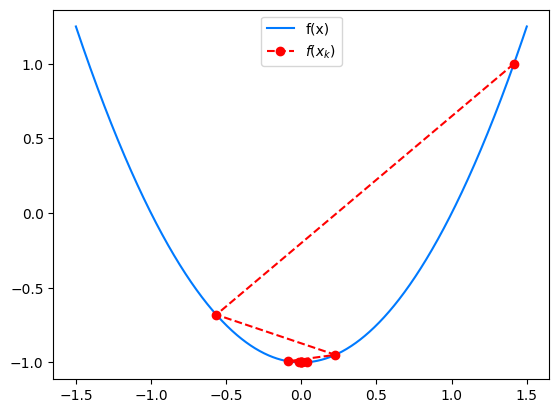

In [63]:
x = np.linspace(-1.5, 1.5, 1000)
y = x**2 - 1
x_armijo = np.zeros(10)
y_armijo = np.zeros(10)

for k in range(10):
    x_armijo[k] = solutions[k]
    y_armijo[k] = x_armijo[k]**2 - 1

fig, ax = plt.subplots()
ax.plot(x, y, '-', color='#007AFF', label='f(x)')
ax.plot(x_armijo, y_armijo, 'o--', color='#FF0000', label=r'$f(x_k)$')
ax.legend(loc='upper center')
plt.show()

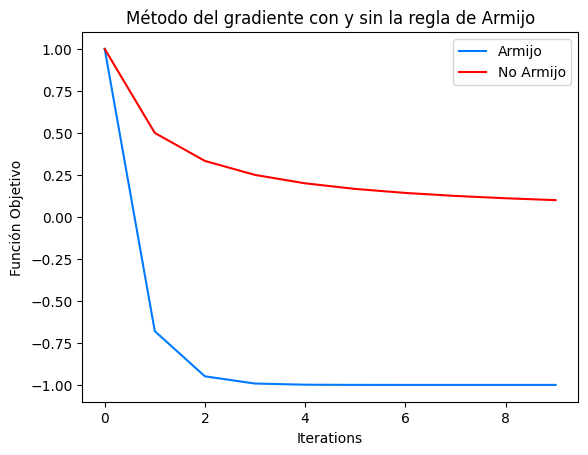

In [64]:
fig, ax = plt.subplots()
ax.plot(iterations, scores, '-', color='#007AFF', label='Armijo')
ax.plot(iterations, yy, 'r-', label='No Armijo')
ax.set(xlabel='Iterations', ylabel='Función Objetivo', title="Método del gradiente con y sin la regla de Armijo")
ax.legend(loc='upper right')
plt.show()